In [1]:
using DataFrames, Gadfly

INFO: Precompiling module Gadfly.


In [117]:

data = readtable("deseasonalizedtraining.csv")

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,x1_1,deseasonalized_divide_mean,deseasonalized_subtract_mean,Temp_Avg,Temp_Avg_Deseasonalize
1,2006-01-01T00:00:00,Aggravated Assault,733,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,662.8333333333334,733,1.1058586874528538,70.16666666666663,38.84408602037883,1.8978494596211704
2,2006-01-01T00:00:00,All Other Offenses,4252,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,2881.3333333333335,4252,1.4757056918093474,1370.6666666666665,38.84408602037883,1.8978494596211704
3,2006-01-01T00:00:00,Arson,44,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,46.666666666666664,44,0.942857142857143,-2.6666666666666643,38.84408602037883,1.8978494596211704
4,2006-01-01T00:00:00,Burglary,906,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,950.8333333333334,906,0.9528483786152497,-44.83333333333337,38.84408602037883,1.8978494596211704
5,2006-01-01T00:00:00,DRIVING UNDER THE INFLUENCE,425,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,449.0,425,0.9465478841870824,-24.0,38.84408602037883,1.8978494596211704
6,2006-01-01T00:00:00,Disorderly Conduct,381,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,330.5,381,1.1527987897125567,50.5,38.84408602037883,1.8978494596211704
7,2006-01-01T00:00:00,Drinking Violation,63,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,60.5,63,1.0413223140495869,2.5,38.84408602037883,1.8978494596211704
8,2006-01-01T00:00:00,Embezzlement,40,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,38.833333333333336,40,1.0300429184549356,1.1666666666666643,38.84408602037883,1.8978494596211704
9,2006-01-01T00:00:00,Forgery and Counterfeiting,68,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,52.5,68,1.2952380952380953,15.5,38.84408602037883,1.8978494596211704
10,2006-01-01T00:00:00,Fraud,777,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,791.3333333333334,777,0.9818871103622577,-14.333333333333371,38.84408602037883,1.8978494596211704


In [118]:
data[:Month] = DateTime(data[:Month],"yyyy-mm-ddTHH:MM:SS");

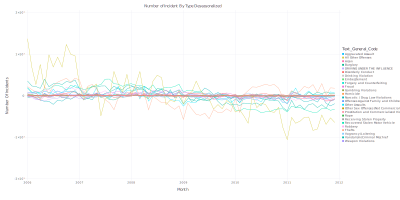

In [119]:
set_default_plot_size(40cm,20cm)
plot(data,x=:Month,y=:deseasonalized_subtract_mean,color=:Text_General_Code,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Number of Incident By Type Deseasonalized"))

In [120]:
#Focusing on Burglary 
DBurglary = data[data[:Text_General_Code].=="Burglary",:]

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,x1_1,deseasonalized_divide_mean,deseasonalized_subtract_mean,Temp_Avg,Temp_Avg_Deseasonalize
1,2006-01-01T00:00:00,Burglary,906,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,950.8333333333334,906,0.9528483786152497,-44.83333333333337,38.84408602037883,1.8978494596211704
2,2006-02-01T00:00:00,Burglary,673,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,696.0,673,0.9669540229885057,-23.0,39.10063535795469,-3.4934924979546835
3,2006-03-01T00:00:00,Burglary,842,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.4516129,35.5483871,44.5,0.94516129,20.25806452,0.032258065,0.029354839,0.0,0.0,3,827.6666666666666,842,1.0173177607732582,14.333333333333371,50.96835288446951,-6.46835288446951
4,2006-04-01T00:00:00,Burglary,781,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.03333333,46.26666667,56.65,2.646666667,8.366666667,0.366666667,0.123666667,0.003333333,0.0,4,845.1666666666666,781,0.9240780911062907,-64.16666666666663,63.35227272727298,-6.702272727272984
5,2006-05-01T00:00:00,Burglary,996,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.83870968,54.25806452,64.5483871,0.648387097,2.64516129,2.451612903,0.069677419,0.0,0.0,5,944.0,996,1.055084745762712,52.0,74.17827468181831,-9.62988758181831
6,2006-06-01T00:00:00,Burglary,921,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.9,64.66666667,72.78333333,-0.466666667,0.066666667,8.0,0.265,0.0,0.0,6,947.3333333333334,921,0.9722026741731175,-26.33333333333337,84.76957070643918,-11.986237376439178
7,2006-07-01T00:00:00,Burglary,1037,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.35483871,70.48387097,79.41935484,1.267741935,0.0,14.64516129,0.137741935,0.0,0.0,7,1037.8333333333333,1037,0.999197045126064,-0.8333333333332575,90.15151515151524,-10.732160311515244
8,2006-08-01T00:00:00,Burglary,1125,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.48387097,69.74193548,78.11290323,1.525806452,0.0,13.32258065,0.126774194,0.0,0.0,8,1116.1666666666667,1125,1.0079139913394057,8.833333333333258,87.6863392007579,-9.573435970757899
9,2006-09-01T00:00:00,Burglary,1003,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.96666667,59.26666667,67.11666667,-2.033333333,1.133333333,3.4,0.199,0.0,0.0,9,1049.1666666666667,1003,0.9559968228752977,-46.16666666666674,79.82638889015136,-12.709722220151363
10,2006-10-01T00:00:00,Burglary,992,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64.96774194,47.38709677,56.17741935,-1.319354839,9.064516129,0.548387097,0.207096774,0.0,0.0,10,1046.1666666666667,992,0.9482236737294886,-54.16666666666674,66.3398093825759,-10.162390032575892


In [121]:
Burglary = data[data[:Text_General_Code].=="Burglary",:]
DP = data[data[:Text_General_Code].=="Prostitution and Commercialized Vice",:];

In [122]:
size(DP)

(72,52)

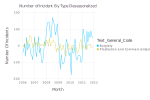

In [123]:
Df = [Burglary;DP]
set_default_plot_size(15cm,10cm)
plot(Df,x=:Month,y=:deseasonalized_subtract_mean,color=:Text_General_Code,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Number of Incident By Type Deseasonalized"))

# Analysis of Burglary

## Model 1: Offset and Unemployment

In [124]:
n = nrow(Burglary)
X₁ = [ones(n) Burglary[:Temp_Avg_Deseasonalize].data]
y₁ = Burglary[:deseasonalized_subtract_mean].data
w₁ = X₁\y₁;

In [125]:
X₁

72×2 Array{Float64,2}:
 1.0    1.89785 
 1.0   -3.49349 
 1.0   -6.46835 
 1.0   -6.70227 
 1.0   -9.62989 
 1.0  -11.9862  
 1.0  -10.7322  
 1.0   -9.57344 
 1.0  -12.7097  
 1.0  -10.1624  
 1.0   -4.23927 
 1.0   -1.10142 
 1.0   -0.650538
 ⋮              
 1.0   -9.56989 
 1.0   -1.86849 
 1.0   -6.82319 
 1.0   -6.53561 
 1.0   -6.80731 
 1.0   -9.3529  
 1.0   -7.78055 
 1.0  -11.5573  
 1.0   -8.69306 
 1.0   -8.67852 
 1.0   -4.15593 
 1.0   -0.536901

In [126]:
w₁

2-element Array{Float64,1}:
 12.3931 
  1.60344

In [127]:
Dmodels1 = Burglary[:,50:50] #get number of crimes deseasonalized
Dmodels2 = Burglary[:,1:1] #get month
Dmodels = [Dmodels2 Dmodels1]
Dmodels[:m1] =  X₁*w₁
Dmodels

,Month,deseasonalized_subtract_mean,m1
1,2006-01-01T00:00:00,-44.83333333333337,15.436139383985024
2,2006-02-01T00:00:00,-23.0,6.79145250033733
3,2006-03-01T00:00:00,14.333333333333371,2.0214459293664504
4,2006-04-01T00:00:00,-64.16666666666663,1.6463697771170835
5,2006-05-01T00:00:00,52.0,-3.0478814747251715
6,2006-06-01T00:00:00,-26.33333333333337,-6.826144163891344
7,2006-07-01T00:00:00,-0.8333333333332575,-4.815308338685055
8,2006-08-01T00:00:00,8.833333333333258,-2.9573647711781135
9,2006-09-01T00:00:00,-46.16666666666674,-7.986207834155879
10,2006-10-01T00:00:00,-54.16666666666674,-3.9017165658393242


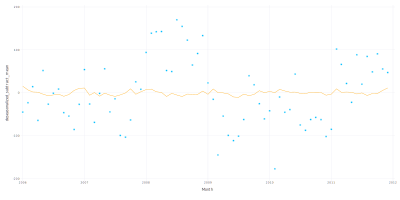

In [128]:
set_default_plot_size(40cm,20cm)
Gadfly.plot(Dmodels,x=:Month,y=:deseasonalized_subtract_mean,
Geom.point,layer(x=:Month,y=:m1,Geom.line,Theme(default_color=colorant"orange")))

# Analysis on Test

In [28]:
test = readtable("test.csv")

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth
1,2012-01-01T00:00:00,All Other Offenses,2621,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
2,2012-01-01T00:00:00,Arson,59,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
3,2012-01-01T00:00:00,DRIVING UNDER THE INFLUENCE,431,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
4,2012-01-01T00:00:00,Disorderly Conduct,322,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
5,2012-01-01T00:00:00,Embezzlement,38,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
6,2012-01-01T00:00:00,Forgery and Counterfeiting,24,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
7,2012-01-01T00:00:00,Fraud,724,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
8,2012-01-01T00:00:00,Gambling Violations,4,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
9,2012-01-01T00:00:00,Narcotic / Drug Law Violations,921,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
10,2012-01-01T00:00:00,Offenses Against Family and Children,9,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323


In [62]:
Dtest = test[test[:Text_General_Code].=="Burglary",:]

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth
1,2012-01-01T00:00:00,Burglary,1080,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.93548387,29.93548387,37.93548387,4.987096774,26.80645161,0.0,0.083548387,0.080645161,0.161290323
2,2012-02-01T00:00:00,Burglary,796,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.82758621,33.06896552,40.94827586,5.086206897,23.75862069,0.0,0.063448276,0.04137931,0.034482759
3,2012-03-01T00:00:00,Burglary,877,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61.67741935,42.70967742,52.19354839,8.638709677,12.70967742,0.129032258,0.025483871,0.0,0.0
4,2012-04-01T00:00:00,Burglary,882,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.73333333,45.36666667,55.55,1.546666667,9.866666667,0.666666667,0.085,0.0,0.0
5,2012-05-01T00:00:00,Burglary,926,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77.16129032,59.16129032,68.16129032,4.261290323,1.096774194,4.516129032,0.108064516,0.0,0.0
6,2012-06-01T00:00:00,Burglary,1000,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83.43333333,63.66666667,73.55,0.3,0.233333333,9.0,0.098,0.0,0.0
7,2012-07-01T00:00:00,Burglary,1029,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90.80645161,72.70967742,81.75806452,3.606451613,0.0,17.0,0.047741935,0.0,0.0
8,2012-08-01T00:00:00,Burglary,1182,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.90322581,70.35483871,78.62903226,2.041935484,0.0,13.87096774,0.173225806,0.0,0.0
9,2012-09-01T00:00:00,Burglary,1067,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78.26666667,62.33333333,70.3,1.15,0.466666667,6.033333333,0.182666667,0.0,0.0
10,2012-10-01T00:00:00,Burglary,1174,2012,0.109,78.6,1258.0,206.8,147,19.7,10.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66.83870968,52.0,59.41935484,1.922580645,6.322580645,1.0,0.131612903,0.0,0.0


In [66]:
Dmodels1 = Dtest[:,3:3]
Dmodels2 = Dtest[:,1:1]
DmodelsTest = [Dmodels2 Dmodels1]
DmodelsTest[:m1] =  X₁*w₁

12-element Array{Float64,1}:
 -7.53227e5
 -8.1318e5 
 -1.03696e6
 -1.10375e6
 -1.35471e6
 -1.46194e6
 -1.62528e6
 -1.56301e6
 -1.39727e6
 -1.18075e6
 -8.77888e5
 -8.56255e5

In [65]:
n = nrow(DtestAOO)
X₁ = [ones(n) DtestAOO[:Temperature_Avg].data]
y₁ = Dtest[:x1].data


12-element Array{Int64,1}:
 1080
  796
  877
  882
  926
 1000
 1029
 1182
 1067
 1174
 1026
  944